Student Performance

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split , cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression , Ridge , Lasso
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error


In [2]:
#load and display the dataset:
data=pd.read_csv("Student_Performances.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [4]:
data.describe(include="all")

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2,NaN,NaN,NaN
top,NaN,NaN,No,NaN,NaN,NaN
freq,NaN,NaN,5052,NaN,NaN,NaN
mean,4.992900,69.445700,NaN,6.530600,4.583300,55.224800
std,2.589309,17.343152,NaN,1.695863,2.867348,19.212558
min,1.000000,40.000000,NaN,4.000000,0.000000,10.000000
25%,3.000000,54.000000,NaN,5.000000,2.000000,40.000000
50%,5.000000,69.000000,NaN,7.000000,5.000000,55.000000
75%,7.000000,85.000000,NaN,8.000000,7.000000,71.000000


In [5]:
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


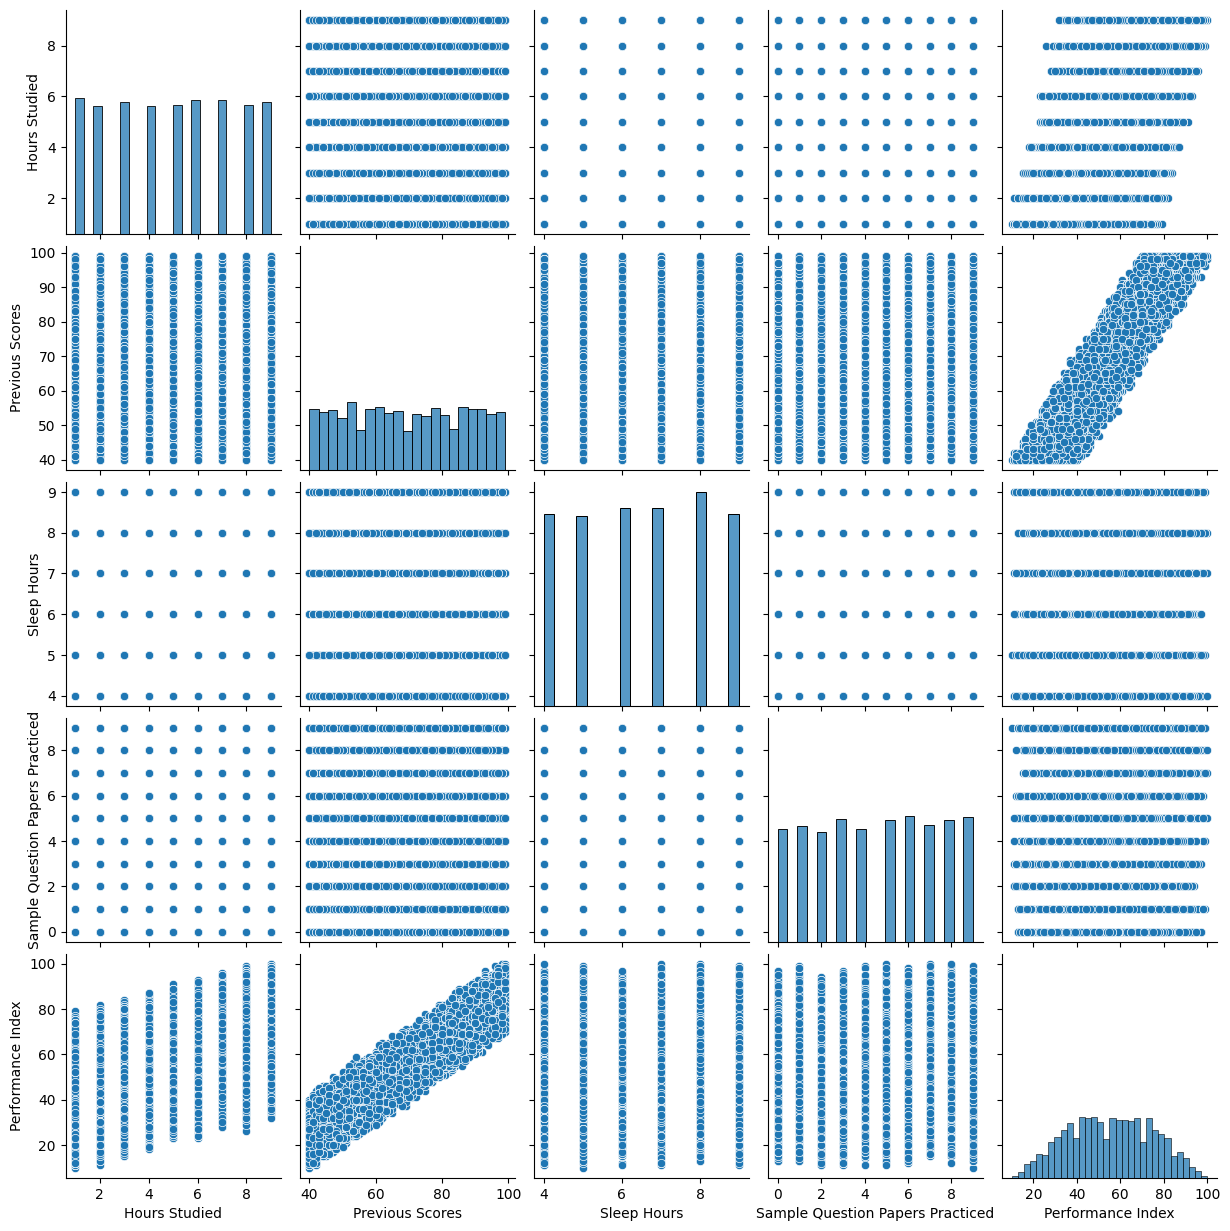

In [6]:
sns.pairplot(data)

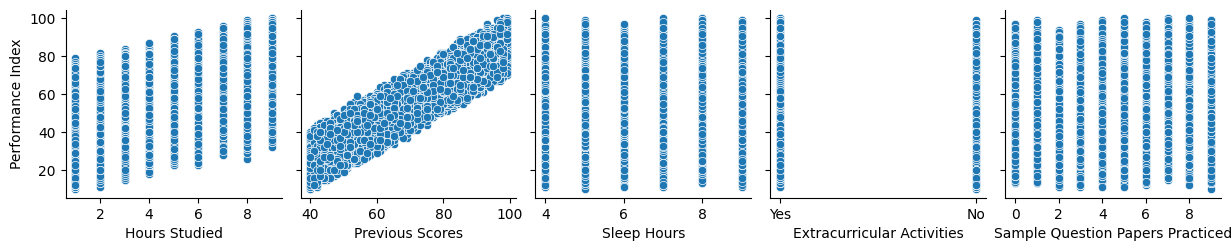

In [7]:
sns.pairplot(
    data,
    x_vars=["Hours Studied", "Previous Scores","Sleep Hours", "Extracurricular Activities","Sample Question Papers Practiced"],
    y_vars=["Performance Index"],
)

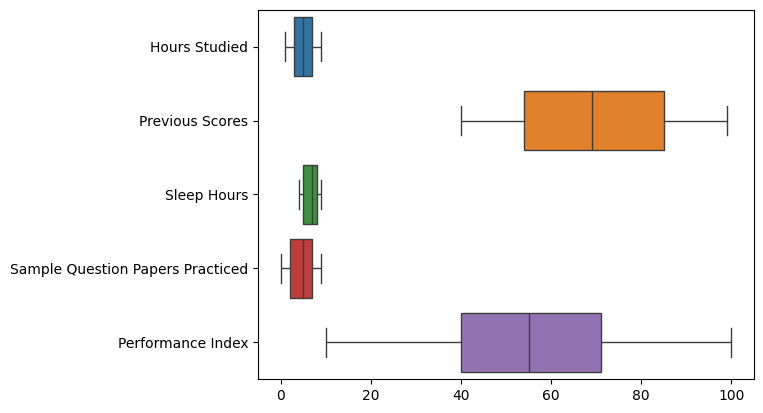

In [8]:
#outliers:
sns.boxplot(data,orient="h")
plt.show()

In [19]:
#label encoding YES and NO in Extracurricular Activities:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder() 

data['Extracurricular Activities']= label_encoder.fit_transform(data['Extracurricular Activities']) 
  
data['Extracurricular Activities'].unique() 

array([1, 0])

In [20]:
!pip install statsmodels

In [21]:
data.columns = data.columns.str.strip()

X = data.drop('Performance Index', axis=1)
Y = data['Performance Index']

print(X.shape)
print(Y.shape)




(10000, 5)
(10000,)


In [24]:
import statsmodels.api as sm
X_const=sm.add_constant(X) #add intercept ie)constant term to the linear model
model=sm.OLS(Y,X_const).fit()#train model
predictions=model.predict(X_const)
residuals=model.resid
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Performance Index   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.757e+05
Date:                Mon, 13 Jan 2025   Prob (F-statistic):               0.00
Time:                        20:23:17   Log-Likelihood:                -21307.
No. Observations:               10000   AIC:                         4.263e+04
Df Residuals:                    9994   BIC:                         4.267e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                              -34.0756      0.127   -268.010      0.000     -34.325     -33.826
Hours Studied                        2.8530      0.008    362.353      0.000       2.838       2.868
Previous Scores                      1.0184      0.001    866.450      0.000       1.016       1.021
Extracurricular Activities           0.6129      0.041     15.029      0.000       0.533       0.693
Sleep Hours                          0.4806      0.012     39.972      0.000       0.457       0.504
Sample Question Papers Practiced     0.1938      0.007     27.257      0.000       0.180       0.208
==============================================================================
Omnibus:                        3.851   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.146   Jarque-Bera (JB):                4.036
Skew:                           0.013   Prob(JB):                        0.133
Kurtosis:                       3.095   Cond. No.                         452.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Model Interpretation</title>
</head>
<body>
    <h1>Interpretation of Model Results</h1>
    <ul>
        <li><strong>R-Squared (98.9%):</strong> This means that the independent variables explain 98.9% of the variance in the Performance Index, indicating a very strong fit.</li>
        <li><strong>Adjusted R-Squared (98.9%):</strong> This confirms that the model is well-fitted and not overfitting or underfitting.</li>
        <li><strong>F-Statistics and Probability Value:</strong> A high F-value and a probability value close to 0 signify that the model is statistically significant and reliable.</li>
    </ul>
    <p>
        Performance Index = -34.0756 + 2.8530 * Hours Studied + 1.0184 * Previous Scores + 0.6129 * Extracurricular Activities + 0.4806 * Sleep Hours + 0.1938 * Sample Question Papers Practiced
    </p>
    <ul>
        <li><strong>p-values and t-statistics:</strong> The p-values are very low, close to 0, and the t-statistics are large, indicating that all five features are significant predictors of the Performance Index.</li>
        <li><strong>Model Diagnostics:</strong>
            <ul>
                <li><strong>Omnibus (3.851) and JB (4.036):</strong> These values show that the residuals are not normally distributed.</li>
                <li><strong>Durbin-Watson (2.001):</strong> This value, approximately equal to 2, indicates no autocorrelation between the independent features.
                    <ul>
                        <li>DW = 2 → no autocorrelation</li>
                        <li>DW < 2 → positive autocorrelation</li>
                        <li>DW > 2 → negative autocorrelation</li>
                    </ul>
                </li>
                <li><strong>Cond. No (452):</strong> Since this value is greater than 30, it suggests that multicollinearity exists in the model.</li>
            </ul>
        </li>
    </ul>
</body>
</html>


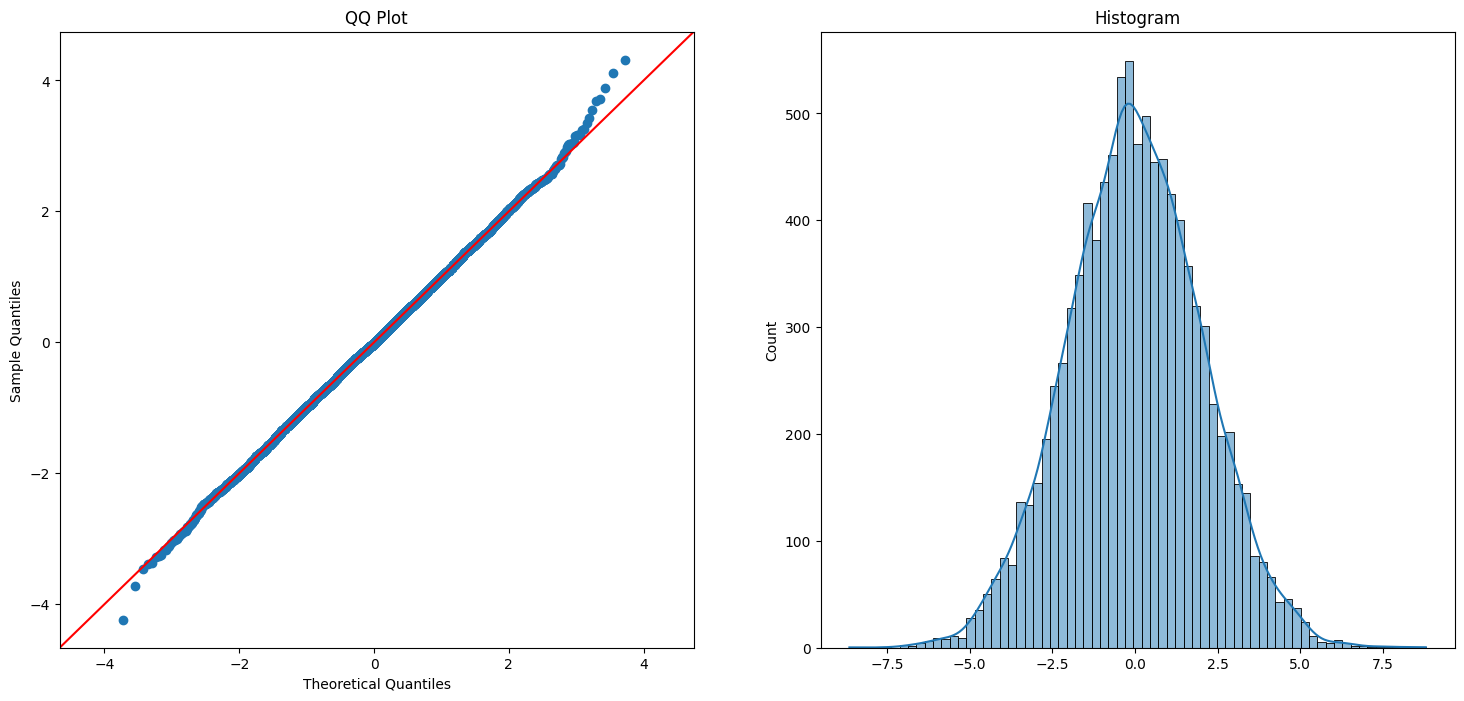

In [25]:
# normality : -- Q-Q plot and histogram:
fig,ax=plt.subplots(1,2,figsize=(18,8))
# for Q-Q plot: the should be at 45 deg 
sm.qqplot(residuals, line='45',fit=True, ax = ax[0])
ax[0].set_title("QQ Plot")

# for histogram :
sns.histplot(residuals , kde=True,ax=ax[1])
ax[1].set_title("Histogram")
plt.show()

Regression models

In [26]:
# implementing regression models:
#train-test_split:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2 , random_state=42)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)


(8000, 5)
(8000,)
(2000, 5)
(2000,)


In [27]:
# model building : linear regression:

linear_model=LinearRegression()
linear_model.fit(X_train , Y_train)
y_pred = linear_model.predict(X_test)


In [28]:
# perfomance evaluation:

r2=r2_score(Y_test , y_pred)
print('r2 is : ', r2)

mse=mean_squared_error(Y_test , y_pred)
print('MSE is : ',mse)

mae = mean_absolute_error(Y_test , y_pred)
print('MAE is : ', mae)

rmse = np.sqrt(mse)
print('RMSE is : ',rmse)

r2 is :  0.9889832909573145
MSE is :  4.082628398521853
MAE is :  1.6111213463123044
RMSE is :  2.0205515085050054


Mean Squared Error (Ridge) : 4.082638193083


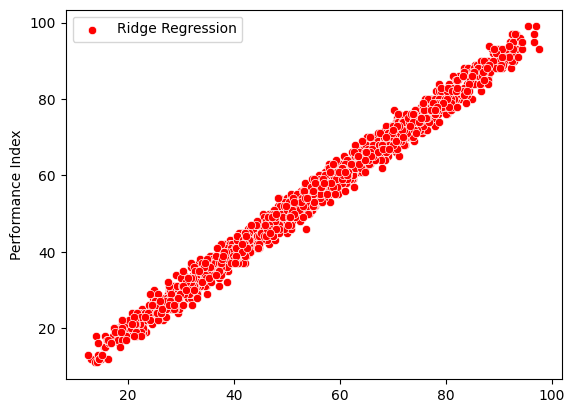

In [29]:
# Ridge model building : as multicollinerity exist in our model:
ridge_model=Ridge(alpha=1.0)
ridge_model.fit(X_train , Y_train)
y_pred_ridge=ridge_model.predict(X_test)
sns.scatterplot(x=y_pred_ridge, y=Y_test , color = 'red', label = 'Ridge Regression')

#Evalution:
mse_ridge= mean_squared_error(Y_test, y_pred_ridge)
print("Mean Squared Error (Ridge) :", mse_ridge)

Mean Squared Error ( Lasso) : 4.3779957690358735


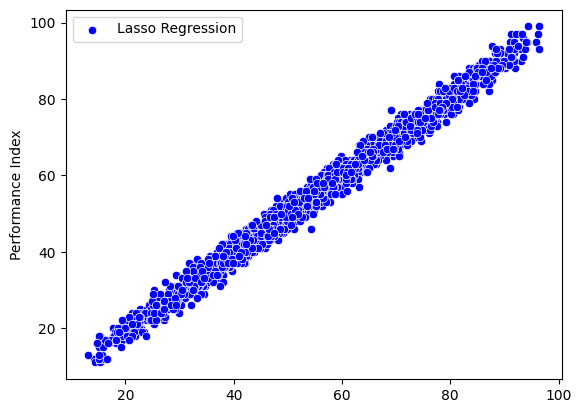

In [30]:
# Lasso model building: 
lasso = Lasso(alpha=0.5)  # alpha is the regularization parameter
lasso.fit(X_train, Y_train)
y_pred_lasso= lasso.predict(X_test)

sns.scatterplot(x=y_pred_lasso, y=Y_test , color = 'blue', label = 'Lasso Regression')

#evalution:
# Evaluate the model
mse_lasso= mean_squared_error(Y_test, y_pred_lasso)
print("Mean Squared Error ( Lasso) :", mse_lasso)